# Import Library

In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.patches as mpatches
import xgboost
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
import string
import plotly.offline as py
import plotly.graph_objs as go

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from collections import Counter
from collections import defaultdict

from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve

from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from plotly import tools
py.init_notebook_mode(connected=True)


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alrziki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alrziki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import important data
Such as post time
and the data

In [3]:
post_time = "2023-07-22T18:10:59.000Z"

In [43]:
data = pd.read_csv('Twitter-post-1682815516853796867.csv')

In [44]:
data.head(10)

,username,comments,retweets,likes,views,datetime
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22T21:00:45.000Z
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22T18:13:29.000Z
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22T18:12:08.000Z
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22T18:14:11.000Z
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22T18:32:13.000Z


In [45]:
lenght = len(data['comments'][0])
print(f'Length of a sample comment: {lenght}')

Length of a sample comment: 52


In [46]:
data['Length'] = data['comments'].str.len()
data.head(10)

,username,comments,retweets,likes,views,datetime,Length
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22T21:00:45.000Z,38
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22T18:13:29.000Z,24
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22T18:12:08.000Z,70
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22T18:14:11.000Z,19
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22T18:32:13.000Z,143


# Count The Length of the sentence and Word

In [47]:
word_count = data['comments'][0].split()
print(f'Word count in a sample comment: {len(word_count)}')

Word count in a sample comment: 11


In [48]:
def word_count(comment):
    comment_list = comment.split()
    return len(comment_list)

In [49]:
data['word_count'] = data['comments'].apply(word_count)
data.head(10)

,username,comments,retweets,likes,views,datetime,Length,word_count
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52,11
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15,3
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23,4
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12,1
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25,4
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22T21:00:45.000Z,38,6
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22T18:13:29.000Z,24,4
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22T18:12:08.000Z,70,11
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22T18:14:11.000Z,19,4
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22T18:32:13.000Z,143,28


In [50]:
data['mean_word_length'] = data['comments'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52,11,3.818182
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15,3,4.333333
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23,4,5.000000
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12,1,12.000000
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25,4,5.500000
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22T21:00:45.000Z,38,6,5.333333
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22T18:13:29.000Z,24,4,5.250000
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22T18:12:08.000Z,70,11,5.454545
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22T18:14:11.000Z,19,4,4.000000
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22T18:32:13.000Z,143,28,4.107143


In [51]:
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['comments'][0])])

52.0

In [52]:
data['mean_sent_length'] = data['comments'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52,11,3.818182,52.0
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15,3,4.333333,15.0
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23,4,5.000000,23.0
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12,1,12.000000,12.0
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25,4,5.500000,25.0
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22T21:00:45.000Z,38,6,5.333333,37.0
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22T18:13:29.000Z,24,4,5.250000,24.0
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22T18:12:08.000Z,70,11,5.454545,70.0
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22T18:14:11.000Z,19,4,4.000000,19.0
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22T18:32:13.000Z,143,28,4.107143,142.0


In [53]:
print(data["username"].unique())

['@IamTrashIknow' '@raven_apex' '@Vozskii' '@non3ofyourbuss0' '@kralrindo'
 '@KarimCheese' '@baguettelander' '@William23R' '@RaiynGG' '@HaddieKaur_'
 '@BloodVariety' '@RoastHimJim' '@Lucas_Haruaka' '@ARampartMain'
 '@SDCore_' '@TysonBrady' '@HamburgerJack' '@Luckerzzz' '@HamzaAce3'
 '@jmirageatrios' '@AMehgend' '@abdo69907770' '@Deamon_99_Pl'
 '@YuhCherry_' '@VibezInu' '@el_phino' '@roxxstarsworld' '@ClarityDavid_'
 '@eatsmokes' '@s1moez' '@Frogervik' '@Ryan_Sully' '@BruederleCamren'
 '@Insanity_Killzz' '@T0M4T05' '@LittlewolfSilas' '@npc_kroha' '@Fuoco136'
 '@Fungi488' '@EthanRoe18' '@carlsen2323' '@pixelesbians' '@BigVance6'
 '@Pettitt_J' '@ygrbmb' '@FabianooAndrade' '@VonderDrake'
 '@BunniesVsFlames' '@upset_guac' '@RiotousOmen' '@Auriemii'
 '@ShiversApex' '@GVavleka' '@bayanipop' '@CyanKyorca' '@Blissyfuul'
 '@scott_Wumbo' '@TruSlimer' '@Y2Kennedy' '@JaykeVerse' '@AndreTheFiend'
 '@FitzCity22' '@DanaZane31' '@R1_GAMES' '@nun_enjoyer' '@Shinobii_Waxii'
 '@LuvKichian' '@CozyBhaiya' '

# Check Duplicated username

In [54]:
user_unique = data["username"].unique()

In [63]:
print(len(user_unique))

140


In [56]:
data2 = data.copy()
data2['duplicated'] = data2.duplicated()

In [57]:
data2[(data2['duplicated']==True)]

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated
19,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52,11,3.818182,52.0,True
20,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15,3,4.333333,15.0,True
21,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23,4,5.000000,23.0,True
22,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12,1,12.000000,12.0,True
23,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25,4,5.500000,25.0,True
...,...,...,...,...,...,...,...,...,...,...,...
858,@Bkprlns14,The player should be your service and your nob...,0,0,94,2023-07-23T09:23:26.000Z,127,22,4.818182,127.0,True
859,@Haydens316,Fuck mirage,0,0,9,2023-07-23T03:24:30.000Z,11,2,5.000000,11.0,True
861,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,740,72.7K,2023-07-29T18:30:51.000Z,68,11,5.272727,68.0,True
862,@Psamatheh,dolled up,57,765,14.8K,2023-07-29T20:03:11.000Z,10,2,4.000000,9.0,True


No data duplicated but let see into the detail to make sure there is no data duplicated

In [66]:
data['duplicated'] = data.duplicated()

In [67]:
# dropping ALL duplicate values
data.drop_duplicates(keep=False, inplace=True)
  


In [72]:
# displaying data
data

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22T18:12:28.000Z,52,11,3.818182,52.0,False
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22T20:57:46.000Z,15,3,4.333333,15.0,False
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23T11:08:22.000Z,23,4,5.000000,23.0,False
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22T19:53:35.000Z,12,1,12.000000,12.0,False
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22T18:53:13.000Z,25,4,5.500000,25.0,False
...,...,...,...,...,...,...,...,...,...,...,...
789,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29T18:30:51.000Z,68,11,5.272727,68.0,False
803,@BirnoOCE,How many heirlooms do you have?,28,580,46.7K,2023-07-30T12:14:27.000Z,31,6,4.333333,31.0,False
824,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29T21:44:35.000Z,49,8,5.250000,49.0,False
839,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30T12:14:27.000Z,31,6,4.333333,31.0,False


In [70]:
pd.concat(g for _, g in data.groupby("username") if len(g) > 1)

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated
754,@BirnoOCE,How many heirlooms do you have?,28,573,45.9K,2023-07-30T12:14:27.000Z,31,6,4.333333,31.0,False
803,@BirnoOCE,How many heirlooms do you have?,28,580,46.7K,2023-07-30T12:14:27.000Z,31,6,4.333333,31.0,False
839,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30T12:14:27.000Z,31,6,4.333333,31.0,False
727,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,728,71.7K,2023-07-29T18:30:51.000Z,68,11,5.272727,68.0,False
789,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29T18:30:51.000Z,68,11,5.272727,68.0,False
41,@Deamon_99_Pl,Why is Revenant is not Glitch out now he was G...,0,0,273,2023-07-22T21:24:04.000Z,96,20,3.850000,96.0,False
167,@Deamon_99_Pl,That skin looks amazing can't wait to get that...,0,0,413,2023-07-22T18:32:00.000Z,69,12,4.833333,69.0,False
404,@Deamon_99_Pl,His icon,0,0,75,2023-07-22T21:25:06.000Z,9,2,3.500000,9.0,False
788,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,937",122.8K,2023-07-29T21:44:35.000Z,49,8,5.250000,49.0,False
824,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29T21:44:35.000Z,49,8,5.250000,49.0,False


In [73]:
data = data.drop([754, 803,727, 803,788, 788])

In [126]:
data = data.reset_index(drop=True)
data

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated,hours,minute,hour_difference,minute_difference,comment_clean,comment_lists
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22 18:12:28+00:00,52,11,3.818182,52.0,False,18,12,0,2,literally bad couldnt pay,"[literally, bad, couldnt, pay]"
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22 20:57:46+00:00,15,3,4.333333,15.0,False,20,57,2,167,please buff,"[please, buff]"
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23 11:08:22+00:00,23,4,5.000000,23.0,False,11,8,7,422,cooking,[cooking]
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22 19:53:35+00:00,12,1,12.000000,12.0,False,19,53,1,103,roasthimjim,[roasthimjim]
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22 18:53:13+00:00,25,4,5.500000,25.0,False,18,53,0,43,whos recording area,"[whos, recording, area]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,@RednappD,Give me a genuine reason as to why I should ke...,0,0,9,2023-07-22 21:02:19+00:00,80,18,3.500000,39.5,False,21,2,3,188,give genuine reason keep playing game wait,"[give, genuine, reason, keep, playing, game, w..."
139,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29 18:30:51+00:00,68,11,5.272727,68.0,False,18,30,0,20,octane mains seeing revenant double jump apexl...,"[octane, mains, seeing, revenant, double, jump..."
140,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29 21:44:35+00:00,49,8,5.250000,49.0,False,21,44,3,214,know maybe apex doesnt need crossovers,"[know, maybe, apex, doesnt, need, crossovers]"
141,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30 12:14:27+00:00,31,6,4.333333,31.0,False,12,14,6,364,many heirlooms,"[many, heirlooms]"


# Data Info

In [75]:
data.describe()

,retweets,Length,word_count,mean_word_length,mean_sent_length
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,2.132867,46.363636,8.713287,5.168169,37.174359
std,11.398195,46.235854,8.810703,3.774555,31.662423
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,15.000000,3.000000,3.895833,14.000000
50%,0.000000,32.000000,6.000000,4.333333,31.000000
75%,0.000000,58.000000,11.000000,5.045455,48.000000
max,82.000000,277.000000,50.000000,32.000000,178.000000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 860
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   username          143 non-null    object 
 1   comments          143 non-null    object 
 2   retweets          143 non-null    int64  
 3   likes             143 non-null    object 
 4   views             143 non-null    object 
 5   datetime          143 non-null    object 
 6   Length            143 non-null    int64  
 7   word_count        143 non-null    int64  
 8   mean_word_length  143 non-null    float64
 9   mean_sent_length  143 non-null    float64
 10  duplicated        143 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 12.4+ KB


# Create Hours, Minute, Hours difference, and Minutes Difference

The reason to do this so we can see the comment trends

In [77]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [78]:
data['hours'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

In [79]:
data

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated,hours,minute
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22 18:12:28+00:00,52,11,3.818182,52.0,False,18,12
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22 20:57:46+00:00,15,3,4.333333,15.0,False,20,57
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23 11:08:22+00:00,23,4,5.000000,23.0,False,11,8
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22 19:53:35+00:00,12,1,12.000000,12.0,False,19,53
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22 18:53:13+00:00,25,4,5.500000,25.0,False,18,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,@RednappD,Give me a genuine reason as to why I should ke...,0,0,9,2023-07-22 21:02:19+00:00,80,18,3.500000,39.5,False,21,2
789,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29 18:30:51+00:00,68,11,5.272727,68.0,False,18,30
824,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29 21:44:35+00:00,49,8,5.250000,49.0,False,21,44
839,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30 12:14:27+00:00,31,6,4.333333,31.0,False,12,14


In [80]:
post_times = pd.to_datetime(post_time)

In [81]:
post_hour = post_times.hour
post_minute = post_times.minute

In [82]:
print(post_hour)
print(post_minute)

18
10


In [83]:
data['hour_difference'] = abs(data['hours'] - post_hour)
data['minute_difference'] = (abs((data['hours'] - post_hour)) * 60) + abs(data['minute'] - post_minute)
data

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated,hours,minute,hour_difference,minute_difference
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22 18:12:28+00:00,52,11,3.818182,52.0,False,18,12,0,2
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22 20:57:46+00:00,15,3,4.333333,15.0,False,20,57,2,167
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23 11:08:22+00:00,23,4,5.000000,23.0,False,11,8,7,422
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22 19:53:35+00:00,12,1,12.000000,12.0,False,19,53,1,103
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22 18:53:13+00:00,25,4,5.500000,25.0,False,18,53,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,@RednappD,Give me a genuine reason as to why I should ke...,0,0,9,2023-07-22 21:02:19+00:00,80,18,3.500000,39.5,False,21,2,3,188
789,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29 18:30:51+00:00,68,11,5.272727,68.0,False,18,30,0,20
824,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29 21:44:35+00:00,49,8,5.250000,49.0,False,21,44,3,214
839,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30 12:14:27+00:00,31,6,4.333333,31.0,False,12,14,6,364


In [84]:
data['minute_difference'].value_counts()

minute_difference
2      9
1      5
3      4
10     4
4      4
      ..
338    1
143    1
550    1
120    1
364    1
Name: count, Length: 106, dtype: int64

# Simple Analysis - 1 from the data

Positive Review Words:0        2
1      167
2      422
3      103
4       43
      ... 
769    188
789     20
824    214
839    364
860    214
Name: minute_difference, Length: 143, dtype: int32


C:\Users\Alrziki\AppData\Local\Temp\ipykernel_24232\1140532866.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




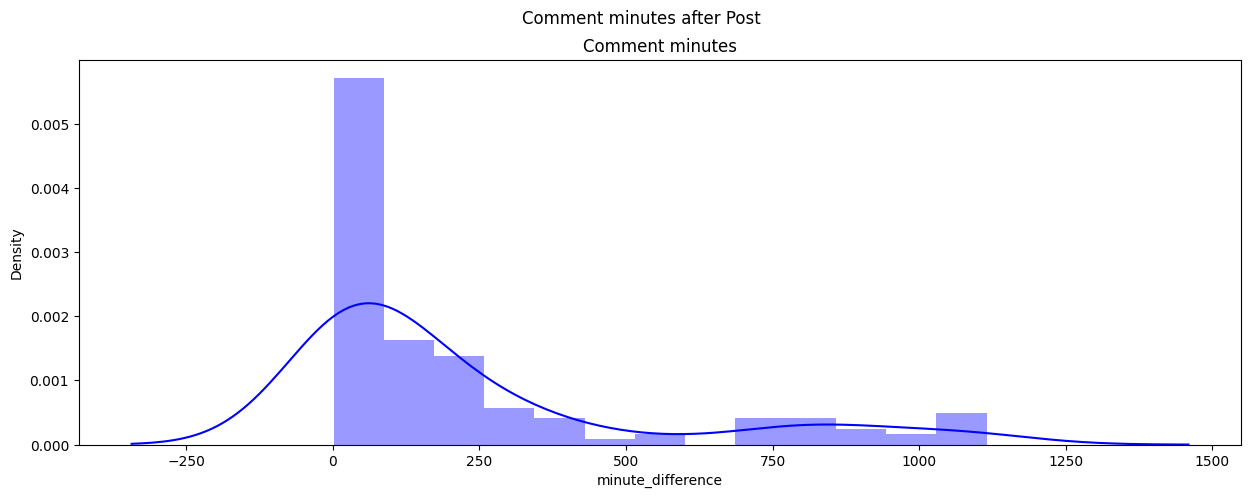

In [85]:
#Analyse the comment trends
#Function for checking word length
#def cal_len(data):
#    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,title_1,subtitle):
    fig,(ax1)=plt.subplots(1,1,figsize=(15,5))
    sns.distplot(count_ones,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    #sns.distplot(count_ones,ax=ax2,color='Red')
    #ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=data['minute_difference']
print("Positive Review Words:" + str(count_good_words))
plot_count(count_good_words,"Comment minutes","Comment minutes after Post")

C:\Users\Alrziki\AppData\Local\Temp\ipykernel_24232\4135493439.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




[Text(0.5, 0, 'Hours After Post'), Text(0, 0.5, 'Count')]

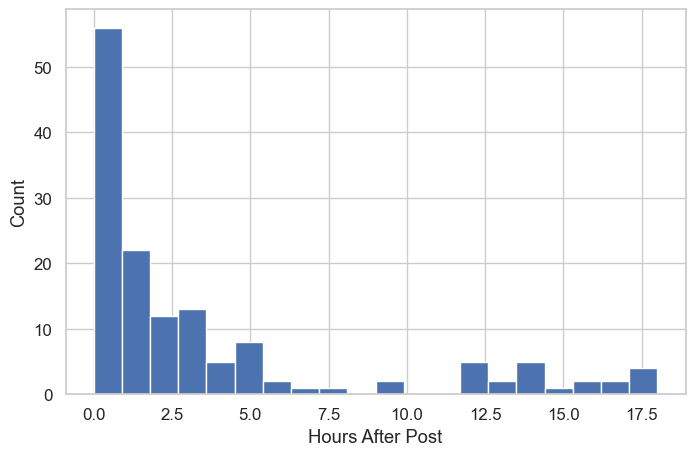

In [86]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['hour_difference'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Hours After Post', ylabel='Count')

C:\Users\Alrziki\AppData\Local\Temp\ipykernel_24232\1443030893.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




[Text(0.5, 0, 'Minute After Post'), Text(0, 0.5, 'Count')]

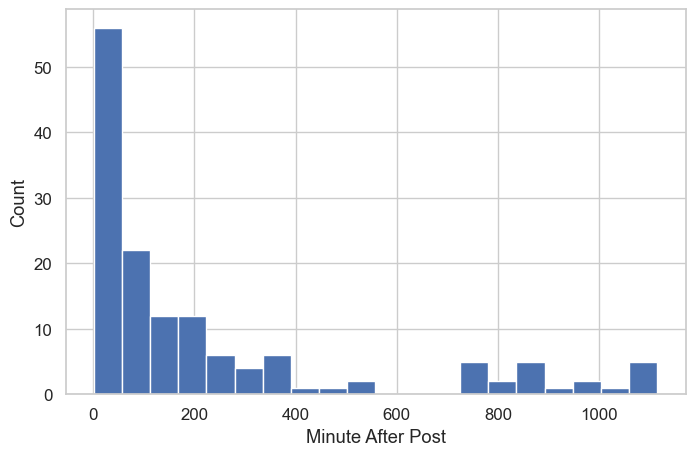

In [87]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['minute_difference'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Minute After Post', ylabel='Count')

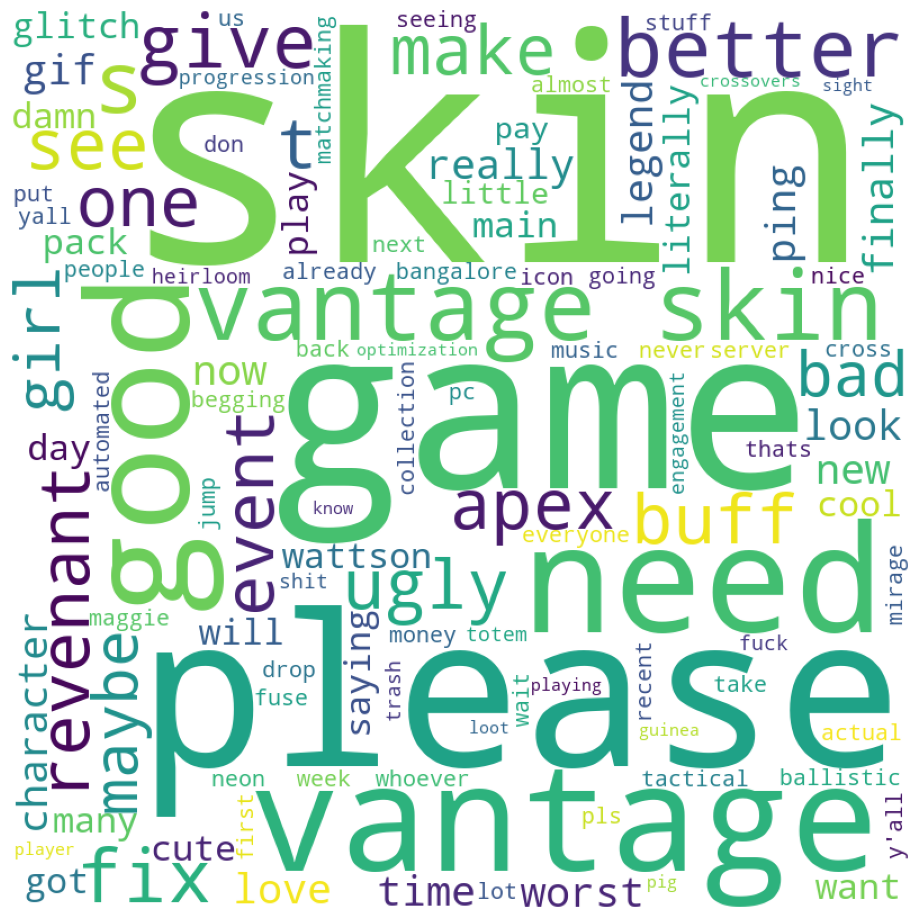

In [88]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 14).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<Axes: >

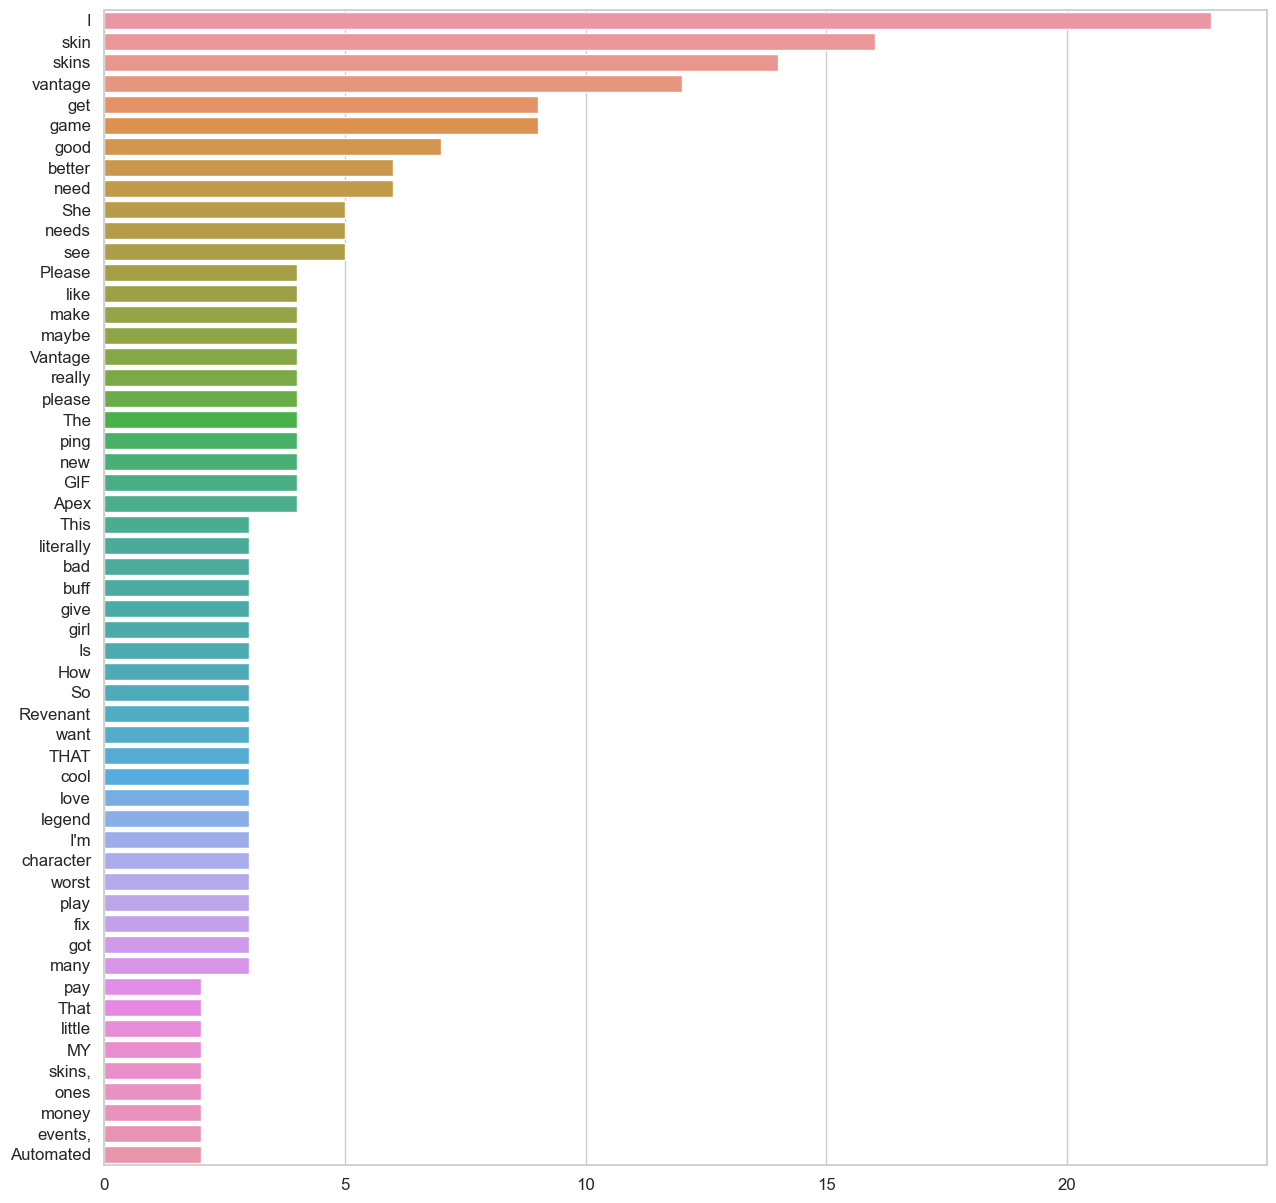

In [89]:
#Simplified counter function

def create_corpus():
    corpus=[]
    
    for x in data['comments'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus()
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)

plt.figure(figsize=(15,15))
sns.barplot(x=y,y=x)

# Simple Analysis - 2 from the data

In [127]:
def clean(comment):
    
    comment = comment.lower()
    comment = re.sub('[^a-z A-Z 0-9-]+', '', comment)
    comment = " ".join([word for word in comment.split() if word not in stop_words])
    
    return comment

In [128]:
data['comment_clean'] = data['comments'].apply(clean)
data.head(10)

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated,hours,minute,hour_difference,minute_difference,comment_clean,comment_lists
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22 18:12:28+00:00,52,11,3.818182,52.0,False,18,12,0,2,literally bad couldnt pay,"[literally, bad, couldnt, pay]"
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22 20:57:46+00:00,15,3,4.333333,15.0,False,20,57,2,167,please buff,"[please, buff]"
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23 11:08:22+00:00,23,4,5.000000,23.0,False,11,8,7,422,cooking,[cooking]
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22 19:53:35+00:00,12,1,12.000000,12.0,False,19,53,1,103,roasthimjim,[roasthimjim]
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22 18:53:13+00:00,25,4,5.500000,25.0,False,18,53,0,43,whos recording area,"[whos, recording, area]"
5,@KarimCheese,That transmission is a little funky..,0,2,"3,027",2023-07-22 21:00:45+00:00,38,6,5.333333,37.0,False,21,0,3,190,transmission little funky,"[transmission, little, funky]"
6,@baguettelander,WOOHOO MY GIRLIEEEE <<33,0,31,"2,997",2023-07-22 18:13:29+00:00,24,4,5.250000,24.0,False,18,13,0,3,woohoo girlieeee 33,"[woohoo, girlieeee, 33]"
7,@William23R,"She needs better skins, she's starting to get ...",0,27,"2,566",2023-07-22 18:12:08+00:00,70,11,5.454545,70.0,False,18,12,0,2,needs better skins shes starting get bangalore...,"[needs, better, skins, shes, starting, get, ba..."
8,@RaiynGG,i see no difference,0,6,"2,482",2023-07-22 18:14:11+00:00,19,4,4.000000,19.0,False,18,14,0,4,see difference,"[see, difference]"
9,@HaddieKaur_,PLEEK give my girl vantage better skins cus al...,0,4,723,2023-07-22 18:32:13+00:00,143,28,4.107143,142.0,False,18,32,0,22,pleek give girl vantage better skins cus recen...,"[pleek, give, girl, vantage, better, skins, cu..."


In [129]:
def corpus(text):
    text_list = text.split()
    return text_list

In [130]:
data['comment_lists'] = data['comment_clean'].apply(corpus)
data

,username,comments,retweets,likes,views,datetime,Length,word_count,mean_word_length,mean_sent_length,duplicated,hours,minute,hour_difference,minute_difference,comment_clean,comment_lists
0,@IamTrashIknow,This literally so bad you couldn't pay me to h...,0,78,"7,037",2023-07-22 18:12:28+00:00,52,11,3.818182,52.0,False,18,12,0,2,literally bad couldnt pay,"[literally, bad, couldnt, pay]"
1,@raven_apex,Please buff her,0,114,"8,533",2023-07-22 20:57:46+00:00,15,3,4.333333,15.0,False,20,57,2,167,please buff,"[please, buff]"
2,@Vozskii,what are you cooking…..,0,10,"2,007",2023-07-23 11:08:22+00:00,23,4,5.000000,23.0,False,11,8,7,422,cooking,[cooking]
3,@non3ofyourbuss0,@RoastHimJim,0,0,"2,365",2023-07-22 19:53:35+00:00,12,1,12.000000,12.0,False,19,53,1,103,roasthimjim,[roasthimjim]
4,@kralrindo,who's recording that area,5,185,23.4K,2023-07-22 18:53:13+00:00,25,4,5.500000,25.0,False,18,53,0,43,whos recording area,"[whos, recording, area]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,@RednappD,Give me a genuine reason as to why I should ke...,0,0,9,2023-07-22 21:02:19+00:00,80,18,3.500000,39.5,False,21,2,3,188,give genuine reason keep playing game wait,"[give, genuine, reason, keep, playing, game, w..."
139,@Cris_Snipes,Octane mains seeing that Revenant has a double...,39,735,72.2K,2023-07-29 18:30:51+00:00,68,11,5.272727,68.0,False,18,30,0,20,octane mains seeing revenant double jump apexl...,"[octane, mains, seeing, revenant, double, jump..."
140,@Grrted,"You know what, maybe Apex doesn't need crossovers",82,"1,946",123.3K,2023-07-29 21:44:35+00:00,49,8,5.250000,49.0,False,21,44,3,214,know maybe apex doesnt need crossovers,"[know, maybe, apex, doesnt, need, crossovers]"
141,@BirnoOCE,How many heirlooms do you have?,28,583,47.1K,2023-07-30 12:14:27+00:00,31,6,4.333333,31.0,False,12,14,6,364,many heirlooms,"[many, heirlooms]"


In [123]:
for i in range(0, 143):
    print(data.loc[[i]])

         username                                           comments  \
0  @IamTrashIknow  This literally so bad you couldn't pay me to h...   

   retweets likes  views                  datetime  Length  word_count  \
0         0    78  7,037 2023-07-22 18:12:28+00:00      52          11   

   mean_word_length  mean_sent_length  duplicated  hours  minute  \
0          3.818182              52.0       False     18      12   

   hour_difference  minute_difference              comment_clean  \
0                0                  2  literally bad couldnt pay   

                    comment_lists  
0  [literally, bad, couldnt, pay]  
      username         comments  retweets likes  views  \
1  @raven_apex  Please buff her         0   114  8,533   

                   datetime  Length  word_count  mean_word_length  \
1 2023-07-22 20:57:46+00:00      15           3          4.333333   

   mean_sent_length  duplicated  hours  minute  hour_difference  \
1              15.0       False     2

KeyError: "None of [Index([19], dtype='int32')] are in the [index]"

In [131]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['comment_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 35690.89it/s]


732

In [132]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('skin', 22),
 ('vantage', 20),
 ('skins', 19),
 ('please', 12),
 ('game', 12),
 ('good', 10),
 ('get', 9),
 ('better', 7),
 ('give', 6),
 ('fix', 6)]

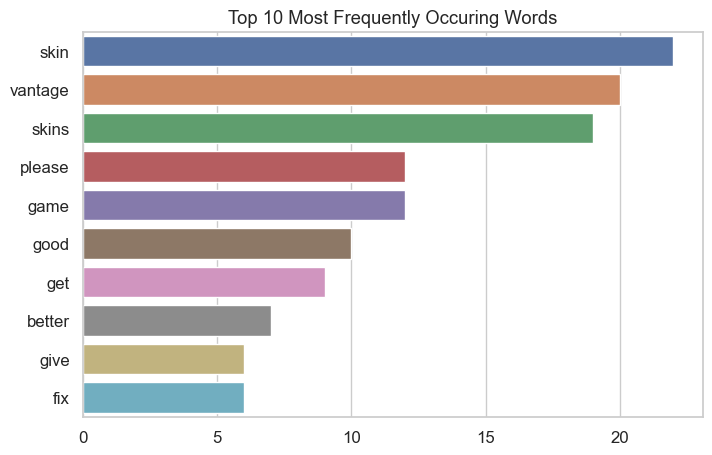

In [133]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

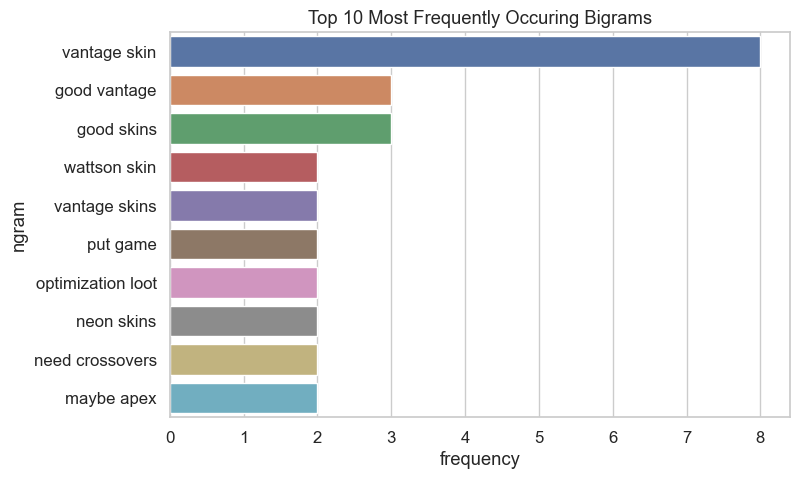

In [134]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['comment_clean'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [135]:
data.to_csv('twitter-simple-clean.csv', index=False)